# Generating PMO Comparison Plots

The aim of this file is to produce the plots that incorporate both our results on a certain benchmark, as well as the benchmarks for other methods from the PMO benchmark.

## Setup

### Change Working Directory

In [1]:
# Change working directory to the parent of the parent of the script

import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent of the parent directory
parent_parent_directory = os.path.abspath(os.path.join(current_directory, '..', '..'))

# Change the working directory to the parent of the parent directory
os.chdir(parent_parent_directory)

# Verify the change by printing the new working directory
print("New working directory:", os.getcwd())


New working directory: /homes/mf2818/modules/Software_eng/bo_molecules


### Imports

In [36]:
# Third-party imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
# Module Imports
from modules.utils.read_sample_store import read_compressed_or_regular_json, buffer_to_dataframe

[04/26/24 19:35:05] WARNING  To use the Graphein submodule                                         ]8;id=703454;file:///vol/bitbucket/mf2818/molopt/lib/python3.10/site-packages/graphein/protein/features/sequence/embeddings.py\embeddings.py]8;;\:]8;id=307869;file:///vol/bitbucket/mf2818/molopt/lib/python3.10/site-packages/graphein/protein/features/sequence/embeddings.py#44\44]8;;\
                             graphein.protein.features.sequence.embeddings, you need to install:                   
                             biovec                                                                                
                             To do so, use the following command: pip install biovec                               
                             Alternatively, you can install graphein with the extras:                              
                                                                                                                   
                             pip install graphein[extras]                                                          

[04/26/24 19:35:06] WARNING  To use the Graphein submodule graphein.protein.visualisation, you  ]8;id=927887;file:///vol/bitbucket/mf2818/molopt/lib/python3.10/site-packages/graphein/protein/visualisation.py\visualisation.py]8;;\:]8;id=764848;file:///vol/bitbucket/mf2818/molopt/lib/python3.10/site-packages/graphein/protein/visualisation.py#35\35]8;;\
                             need to install: pytorch3d                                                            
                             pytorch3d cannot be installed via pip                                                 

[04/26/24 19:35:07] WARNING  To use the Graphein submodule graphein.protein.meshes, you need to        ]8;id=883401;file:///vol/bitbucket/mf2818/molopt/lib/python3.10/site-packages/graphein/protein/meshes.py\meshes.py]8;;\:]8;id=743041;file:///vol/bitbucket/mf2818/molopt/lib/python3.10/site-packages/graphein/protein/meshes.py#29\29]8;;\
                             install: pytorch3d                                                                    
                             To do so, use the following command: pip install pytorch3d                            

### Specifications

In [37]:
gzbuffer_file_path1 = "experiments/results/zaleplon_mpo/2024-04-22_20-31-51_zaleplon_mpo_3000/buffer.json.gz"
gzbuffer_file_path2 = "experiments/results/2024-04-25_22-32-04_zaleplon_mpo,_1000/buffer.json.gz"
gzbuffer_file_path3 = "experiments/results/zaleplon_mpo/2024-04-22_20-31-51_zaleplon_mpo_3000/buffer.json.gz"
gzbuffer_file_path4 = "experiments/results/zaleplon_mpo/2024-04-22_20-31-51_zaleplon_mpo_3000/buffer.json.gz"

In [38]:
# Specifications for the plot

x_min = 0
x_max = 1000
y_min = 0
y_max = 1.1

### Load buffer from experiment and create top 10 curve

In [39]:
data = read_compressed_or_regular_json(gzbuffer_file_path1)
data2 = read_compressed_or_regular_json(gzbuffer_file_path2)
results_df = buffer_to_dataframe(data)
results_df2 = buffer_to_dataframe(data2)

oracle_name = gzbuffer_file_path1.split("/")[2]
oracle_name2 = gzbuffer_file_path2.split("/")[2]
print(oracle_name)
print(oracle_name2)


zaleplon_mpo
2024-04-25_22-32-04_zaleplon_mpo,_1000


Plot the graphs

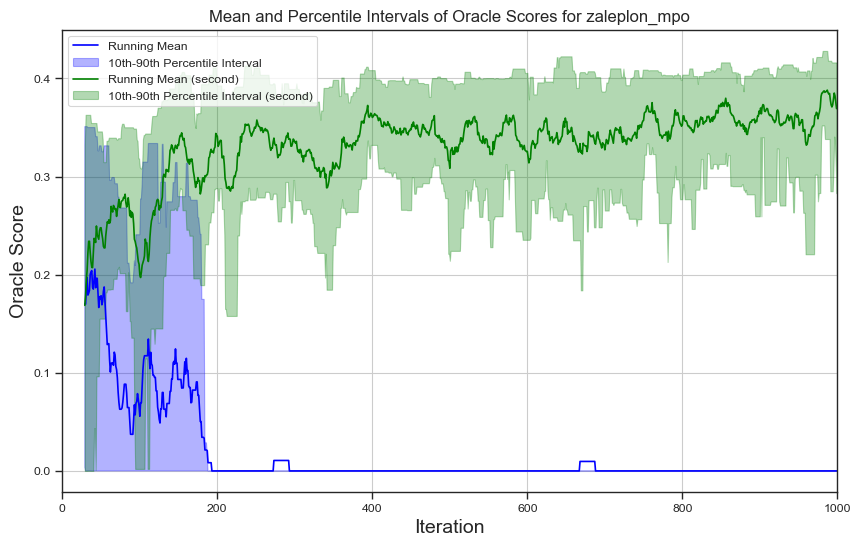

In [41]:
# Setting up Seaborn context and style
sns.set_context('paper', rc={'font.size': 14, 'axes.titlesize': 12, 'axes.labelsize': 14})
sns.set_style('ticks')

# Assuming 'results_df' and 'results_df2' are your dataframes and they're already loaded
window_size = 20  # Define the window size for the running calculations

alpha = 0.3  # Define the alpha value for the confidence interval
lower_int = 0.10  # Define the lower percentile
upper_int = 0.90  # Define the upper percentile

# Calculate the running mean and percentile bounds for both datasets
rolling_mean = results_df['oracle_score'].rolling(window=window_size).mean()
lower_bound = results_df['oracle_score'].rolling(window=window_size).quantile(lower_int)
upper_bound = results_df['oracle_score'].rolling(window=window_size).quantile(upper_int)

rolling_mean2 = results_df2['oracle_score'].rolling(window=window_size).mean()
lower_bound2 = results_df2['oracle_score'].rolling(window=window_size).quantile(lower_int)
upper_bound2 = results_df2['oracle_score'].rolling(window=window_size).quantile(upper_int)

# Plotting the results using matplotlib's plotting functions, styled by Seaborn
plt.figure(figsize=(10, 6))
plt.plot(results_df["iteration"], rolling_mean, label="Running Mean", color='blue')
plt.fill_between(results_df["iteration"], lower_bound, upper_bound, color='blue', alpha=alpha, label="10th-90th Percentile Interval")

plt.plot(results_df2["iteration"], rolling_mean2, label="Running Mean (second)", color='green')
plt.fill_between(results_df2["iteration"], lower_bound2, upper_bound2, color='green', alpha=alpha, label="10th-90th Percentile Interval (second)")

plt.xlabel("Iteration")
plt.ylabel("Oracle Score")
plt.title(f"Mean and Percentile Intervals of Oracle Scores for {oracle_name}")
plt.legend()
plt.grid(True)

plt.xlim(x_min, x_max)
plt.show()
